# IA Paper 2 - Materials - Examples paper 5

## Question 7

The lecture notes contain charts of the creep response of a PVC polymer used for pipes. You wish to analyse the response of such a pipe in a finite-element program. This requires you to enter a constitutive law in the form of parameter values for a spring-dashpot model.

The goals are therefore to calibrate the parameters to fit the data, and to test to what extent the model is able to reproduce the behaviour in the charts using a linear model of this general kind. Assume that you are most interested in relatively short loading times, up to a few hours. Write a Python program to plot a graph of the strain/time response for the step response of the standard model, as derived in the lectures. Make the plot into a similar format to the upper plot in the notes, perhaps using the function `plt.semilogx` to give the logarithmic time scale. Plot a time range $10 − 10^4$ s, and use your program to experiment with parameter values for the springs and dashpot to see whether you can match at least some aspects of the empirical data.

You should find that you cannot match the qualitative shape of the curves in at least one important respect. Why is this? What kind of enhancement to the standard model might be needed to get a better fit?

### Solution

In [1]:
%matplotlib inline

All spring-dashpot models are linear, so they can only be expected to match the behaviour when the stress, strain and strain-rate are all fairly small. Notice that the charts go up to the level labelled 'onset of necking': necking is clearly a non-linear phenomenon so linear models will not work in that regime. The curves for lower stress might be matched, though.

To plot these graphs with Python, first we need to import the necessary modules - `numpy` and `matplotlib`. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Here, we declare the parameters. 

In [3]:
# Declare parameters
k = 2e9
K = 2.9e9
c = 1e12
T0 = c/k
t = np.arange(10, 1e4, 1)

We need a program that loops over the 8 stress cases, then plots the strain-time response on the same axes with a logarithmic time scale and with the vertical axis set to the same range as in the chart. Below is the result, with the parameter values as above.

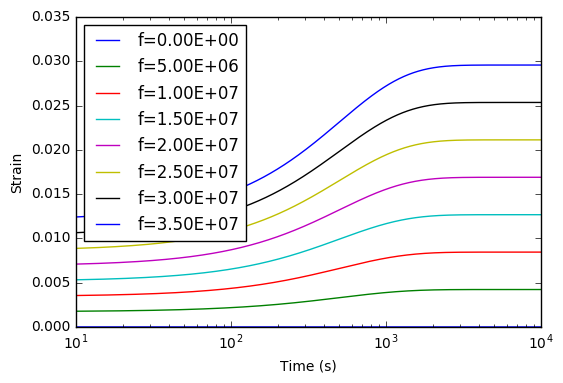

In [4]:
# Loop over different stress state and plot
for istress in range(8):

    # Convert to MPa values as in charts
    f0 = istress*5e6

    # Calculate the strain
    strain = f0*(1/K+1/k*(1-np.exp(-t/T0)))

    # Plot and label the stress state
    plt.semilogx(t, strain, label='f={:.2E}'.format(f0))

# Tweaking the final plot
plt.axis([10, 1e4, 0, 0.035])
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend(loc=2);

The absolute levels have been matched, approximately, at the left-hand side. This is more or less the initial elastic response, governed by the value of $K$, so that value is determined quite well by the chart data. The value used here has been determined by iterative experimentation to get the match this close. The higher curves are less well matched than the lower ones, but that is what we expect.

The time evolution then shows roughly the right kind of increasing trend at early times, but the 'standard model' does not allow long-term continuing creep, so all the curves level off to a steady final value. The charts show creep continuing, and a model of this kind will not predict that. What is needed, as a minimum, is to include a series dashpot, as in Q.3. That would at least allow some kind of continuing creep. A real FE program will allow quite a wide range of more complicated spring-dashpot models, and perhaps with further exploring a model could be found that would fit over this entire time range.

Is this the best fit we can obtain? Bearing in mind that we only expect the low-stress cases to match well, we should look carefully at the lowest few curves. The chart data is a bit hard to read down here, but probably the plot above shows an initial rate of rise that is a bit too high. We would really need the data in numerical form rather than in chart form to get a better fit. It is clear, though, that the curves plotted above rise too steeply over the range plotted here. Possibly the fit is a bit better, at early times before the levelling-off, with the larger value, `k = 8e9`: 

In [5]:
# Increase value of k
k = 8e9

This gives:

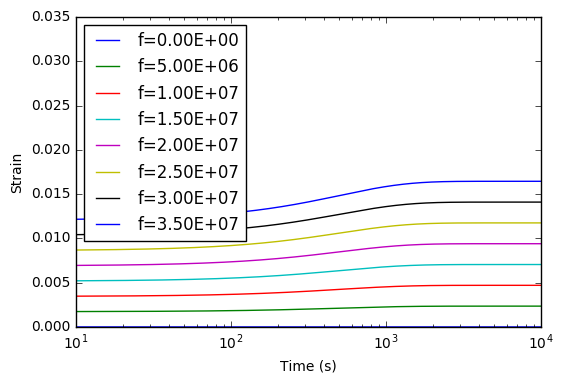

In [6]:
# Loop over different stress state and plot
for istress in range(8):

    # Convert to MPa values as in charts
    f0 = istress*5e6

    # Calculate the strain
    strain = f0*(1/K+1/k*(1-np.exp(-t/T0)))

    # Plot and label the stress state
    plt.semilogx(t, strain, label='f={:.2E}'.format(f0))

# Tweaking the final plot
plt.axis([10, 1e4, 0, 0.035])
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend(loc=2);

The third curve, for example, now rises at a rate that, if the levelling-off were prevented, it would reach roughly the right level by the right-hand side of the plot.

To fully examine the effect of these parameters, we can create an interactive widget. First, let's import `ipywidgets`. 

In [7]:
from ipywidgets import interact, FloatSlider, IntSlider

We create a function that will plot the result for a given set on parameters:

In [8]:
def plot_pvc(n, k, K, c):

    # Calculate the new value for T0
    T0 = c/k

    # Loop over different stress state and plot
    for istress in range(n):

        # Convert to MPa values as in charts
        f0 = istress*5e6

        # Calculate the strain
        strain = f0*(1/K + (1/k)*(1 - np.exp(-t/T0)))

        # Plot and label the stress state
        plt.semilogx(t, strain, label='f={:.2E}'.format(f0))

    # Tweak the final plot
    plt.axis([10, 1e4, 0, 0.035])
    plt.xlabel('time (s)')
    plt.ylabel('strain')
    plt.legend(loc=2)

Now we can add the interactive widget by:

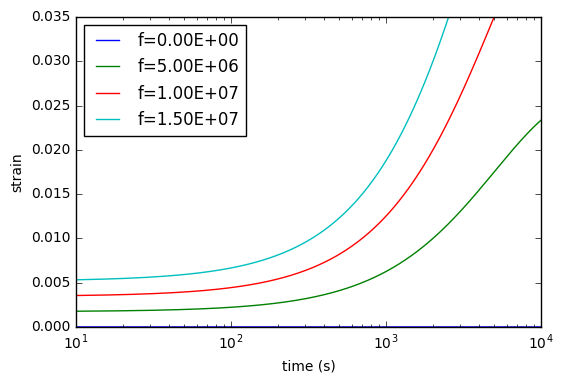

In [9]:
interact(plot_pvc,
         n=IntSlider(min=1, max=10, step=1, value=4, description='No. load states'),
         k=FloatSlider(min=1e7, max=10e8, step=1e7, value=2e8, description='k', readout_format='.2e'),
         K=FloatSlider(min=1e8, max=10e9, step=1e8, value=2.9e9, description='K', readout_format='.2e'),
         c=FloatSlider(min=1e11, max=10e12, step=1e11, value=1e12, description='c', readout_format='.2e'));